### Imports

In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('/Users/waslow/Data/pokemon.csv')

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [5]:
print(f"Shape:\n{df.shape}")

Shape:
(801, 41)


In [6]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [7]:
# check empty values in the data
df.isnull().sum()

# height and weight have 20 empty values each
# percentage_male has 98 empty values
# type2 has 384 missing values, denoting total - 384 pokemon with a single type

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [8]:
print("Number of Pokemon in the dataset: ", df.shape[0])

Number of Pokemon in the dataset:  801


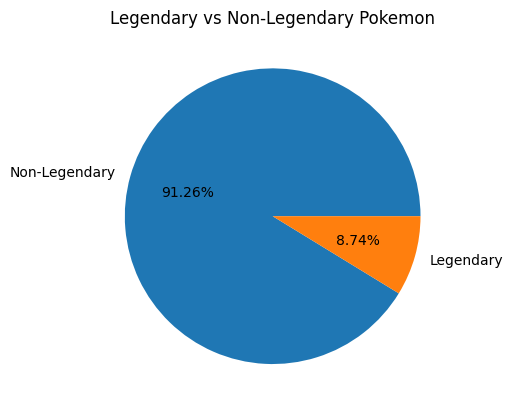

In [9]:
# plot legendary v non-legendary pokemon
plt.pie(x=df['is_legendary'].value_counts(), labels=['Non-Legendary', 'Legendary'], autopct='%0.2f%%')
plt.title('Legendary vs Non-Legendary Pokemon')
plt.show()

In [10]:
features = df.columns.tolist()
import pprint

pp = pprint.PrettyPrinter(indent=4)

pp.pprint(features)

[   'abilities',
    'against_bug',
    'against_dark',
    'against_dragon',
    'against_electric',
    'against_fairy',
    'against_fight',
    'against_fire',
    'against_flying',
    'against_ghost',
    'against_grass',
    'against_ground',
    'against_ice',
    'against_normal',
    'against_poison',
    'against_psychic',
    'against_rock',
    'against_steel',
    'against_water',
    'attack',
    'base_egg_steps',
    'base_happiness',
    'base_total',
    'capture_rate',
    'classfication',
    'defense',
    'experience_growth',
    'height_m',
    'hp',
    'japanese_name',
    'name',
    'percentage_male',
    'pokedex_number',
    'sp_attack',
    'sp_defense',
    'speed',
    'type1',
    'type2',
    'weight_kg',
    'generation',
    'is_legendary']


In [11]:
print('pokemon up to {}th genration are present'.format(df['generation'].max()))
print('pokemons with highest attack stat - ', df[df['attack']==df['attack'].max()]['name'].to_list())
print('pokemon with highest defense stat - ', df[df['defense']==df['defense'].max()]['name'].to_list())
print('pokemon with highest sp_attack stat - ', df[df['sp_attack']==df['sp_attack'].max()]['name'].to_list())
print('pokemon with highest sp_defense stat - ', df[df['sp_defense']==df['sp_defense'].max()]['name'].to_list())
print('pokemon with highest speed stat - ', df[df['speed']==df['speed'].max()]['name'].to_list())
print('pokemon with highest hp stat - ', df[df['hp']==df['hp'].max()]['name'].to_list())
print('pokemons with highest base_total stat - ', df[df['base_total']==df['base_total'].max()]['name'].to_list())

pokemon up to 7th genration are present
pokemons with highest attack stat -  ['Heracross']
pokemon with highest defense stat -  ['Steelix', 'Shuckle', 'Aggron']
pokemon with highest sp_attack stat -  ['Mewtwo']
pokemon with highest sp_defense stat -  ['Shuckle']
pokemon with highest speed stat -  ['Deoxys']
pokemon with highest hp stat -  ['Blissey']
pokemons with highest base_total stat -  ['Mewtwo', 'Rayquaza']


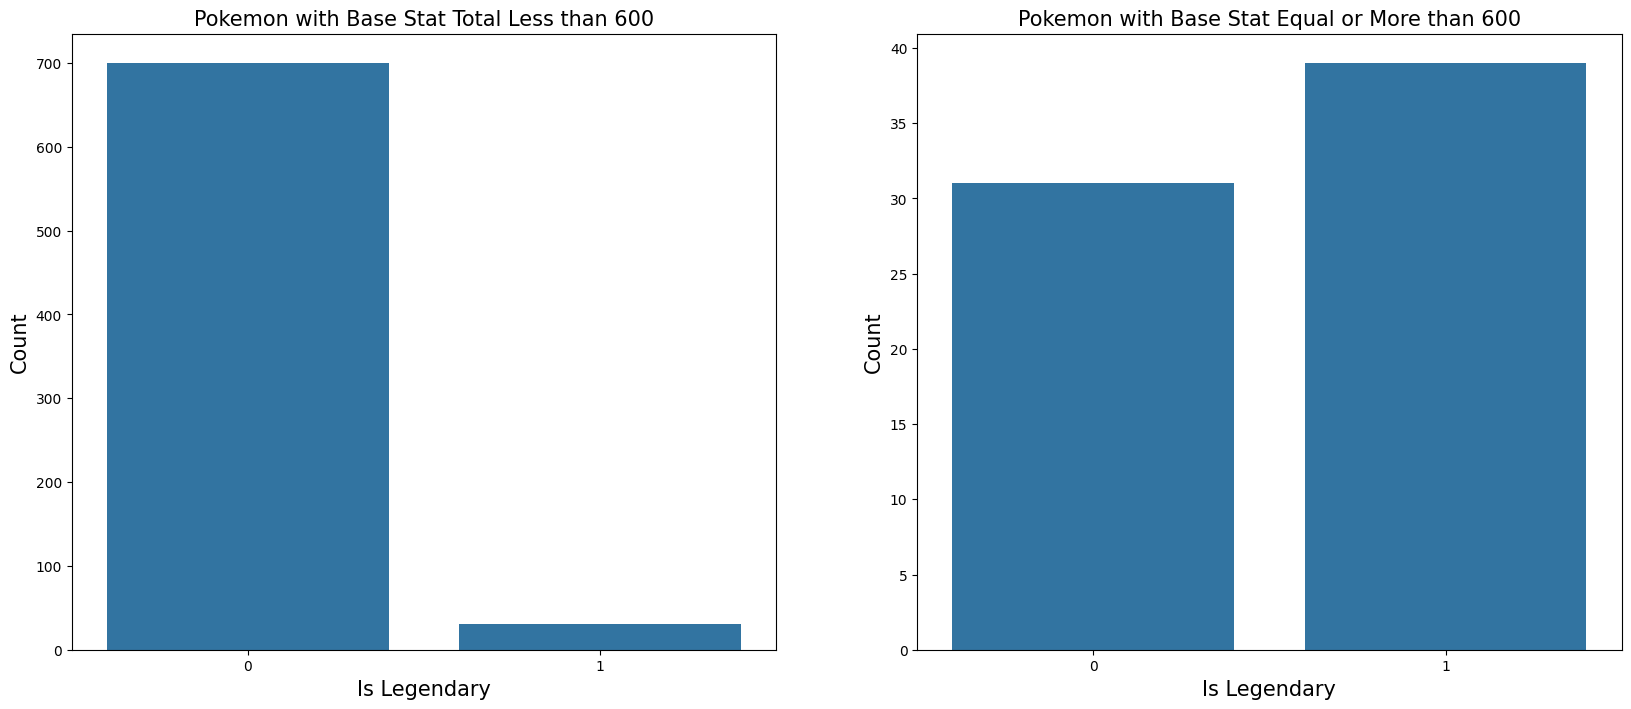

In [12]:
# Compare distribution of base_total for legendary and non-legendary pokemon

# split the df
df_less_than_600 = df[df['base_total']<600]
df_more_than_600 = df[df['base_total']>=600]

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot for Pokemon with base stat total less than 600
sns.countplot(x='is_legendary', data=df_less_than_600, ax=ax1)
ax1.set_title('Pokemon with Base Stat Total Less than 600', {'fontsize': 15})
ax1.set_xlabel('Is Legendary', fontdict={'fontsize': 15})
ax1.set_ylabel('Count', fontdict={'fontsize': 15})

# Plot for Pokemon with base stat equal or more than 600
sns.countplot(x='is_legendary', data=df_more_than_600, ax=ax2)
ax2.set_title('Pokemon with Base Stat Equal or More than 600', {'fontsize': 15})
ax2.set_xlabel('Is Legendary', fontdict={'fontsize': 15})
ax2.set_ylabel('Count', fontdict={'fontsize': 15})

# Display the plots
plt.show()

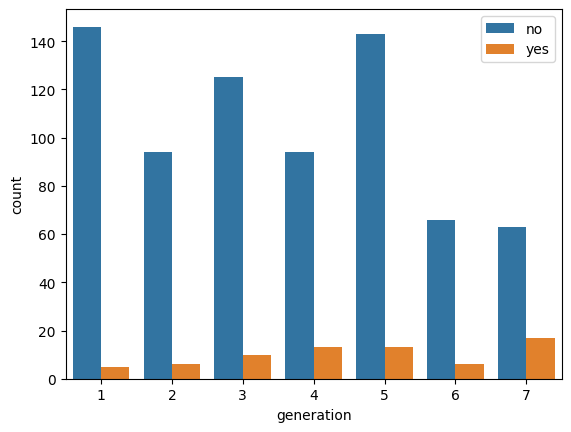

In [13]:
# show legendary pokemon by generation
sns.countplot(x='generation',data=df,hue=df['is_legendary'])
plt.legend(['no','yes'])

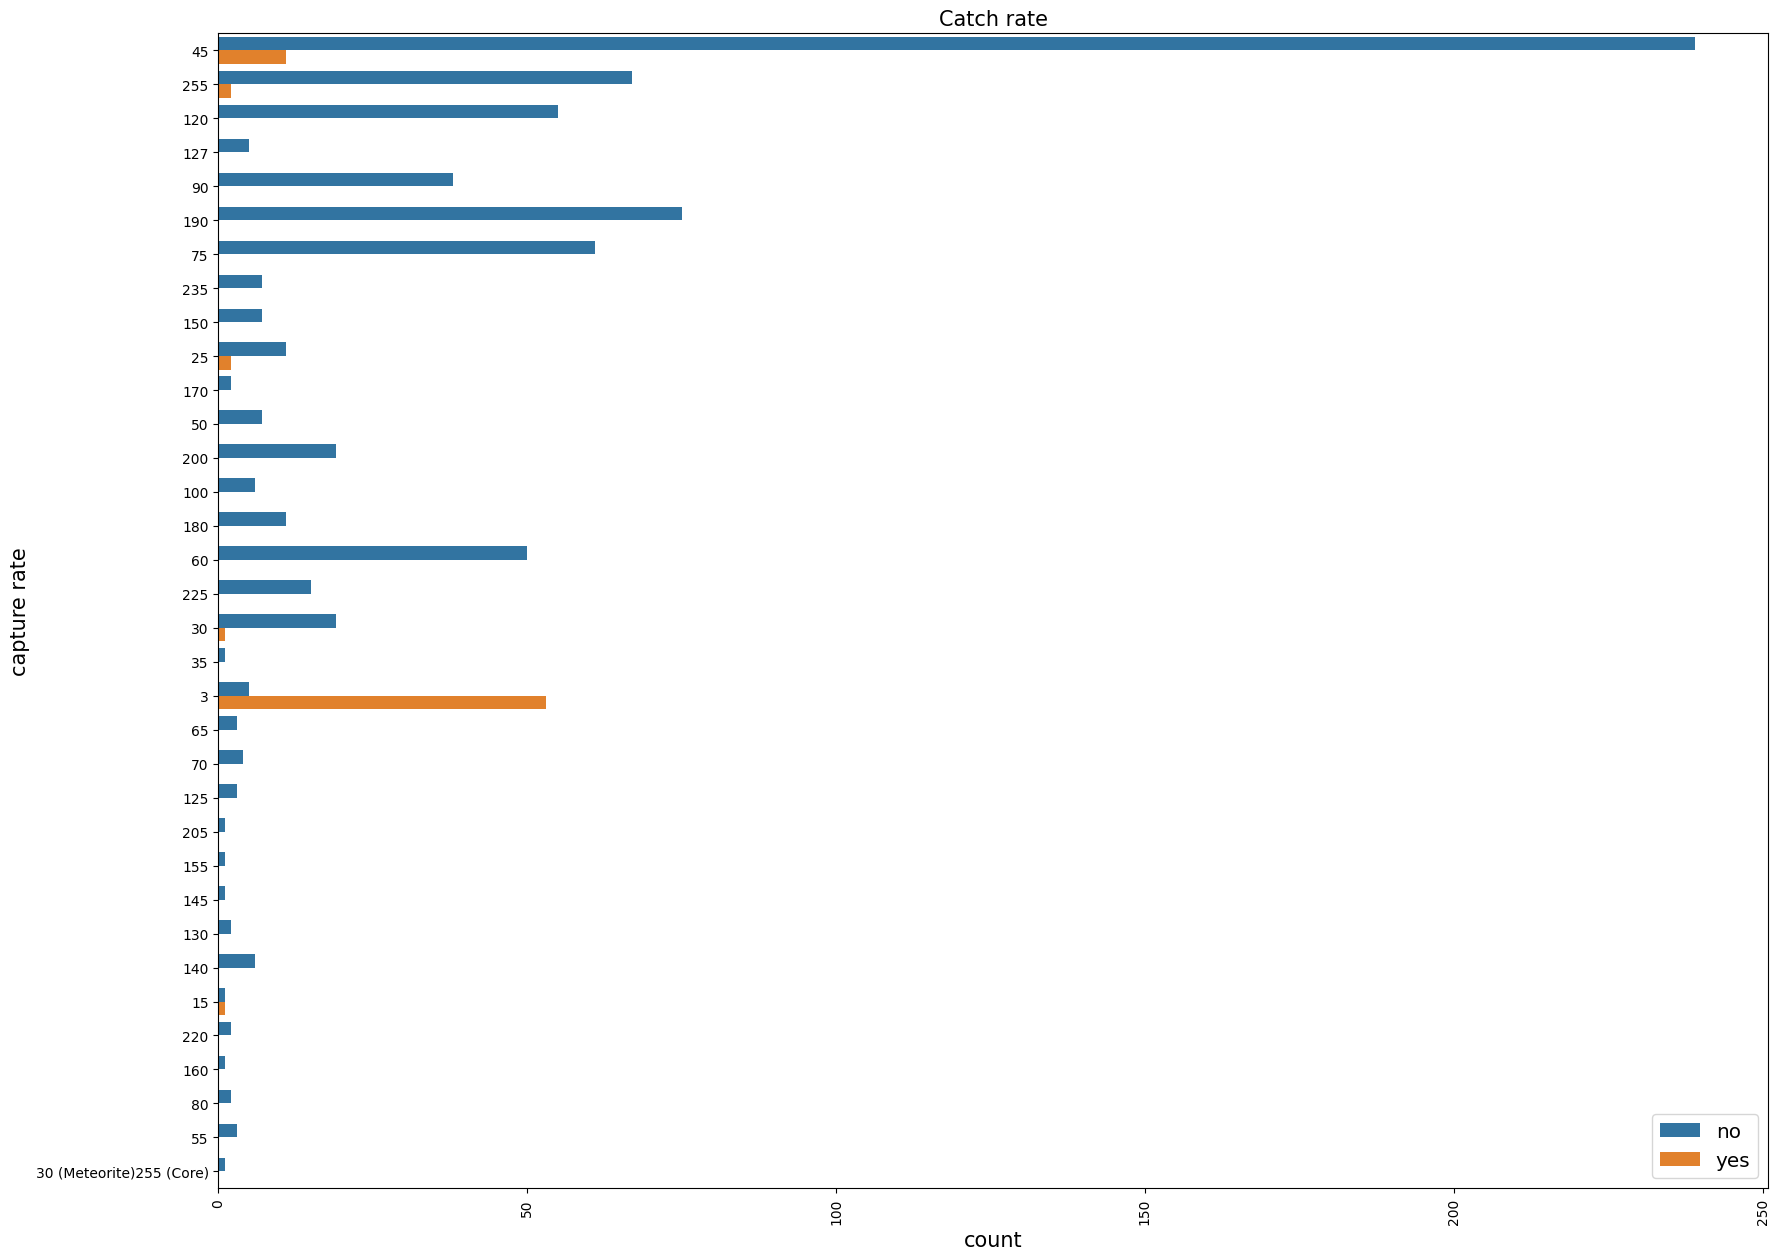

In [14]:
# catch rate by legendary status
plt.figure(figsize=(20,15))
sns.countplot(y=df['capture_rate'].sort_values(),hue=df['is_legendary'])
plt.xticks(rotation = 90)
plt.xlabel('count',fontdict={'fontsize':15})
plt.ylabel('capture rate',fontdict={'fontsize':15})
plt.legend(['no','yes'],fontsize="x-large")
plt.title('Catch rate',fontdict={'fontsize':15})
plt.show()

Text(0.5, 0, 'hp')

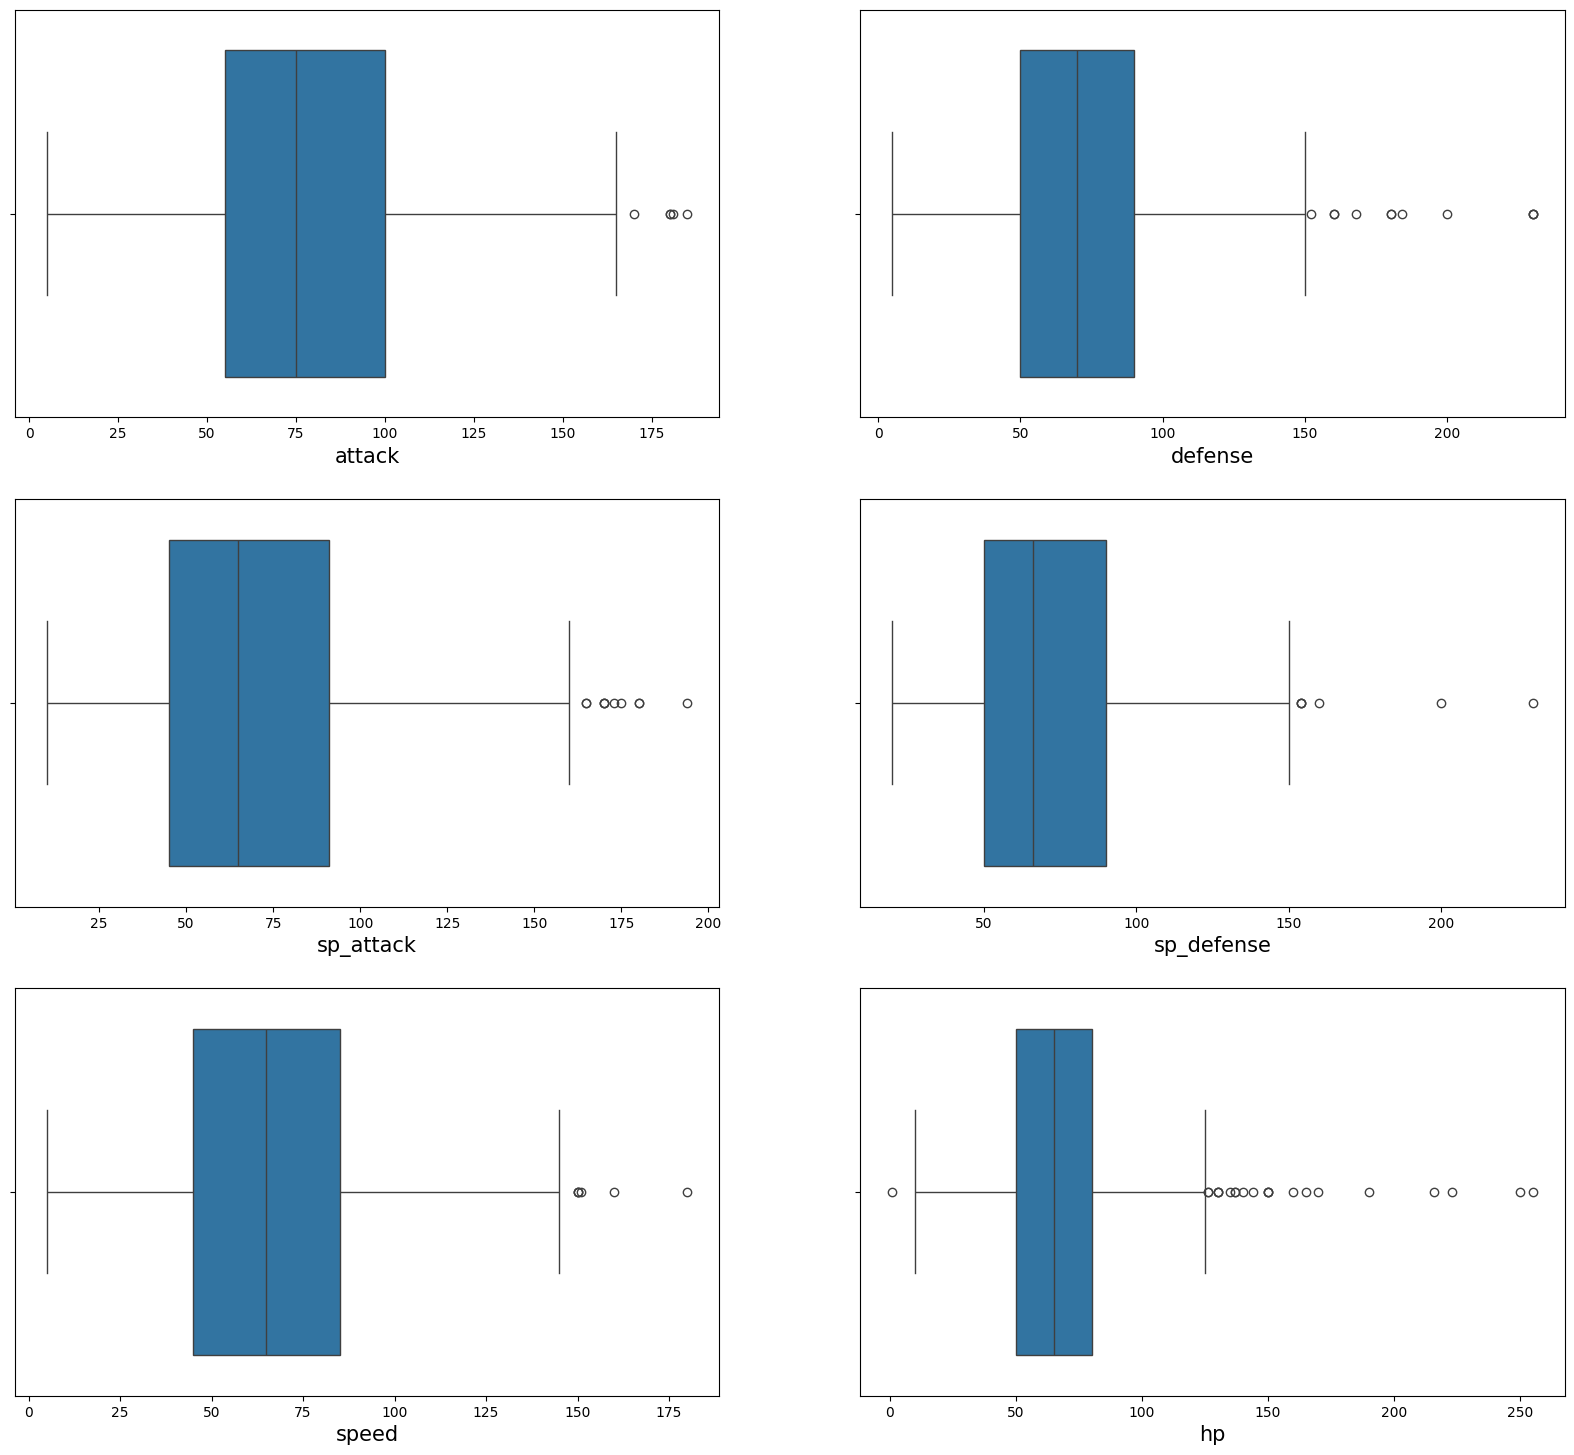

In [15]:
# stat distributions

fig , ax = plt.subplots(nrows=3,ncols=2,figsize=(20,18))

sns.boxplot(x=df['attack'],ax=ax[0][0])
ax[0][0].set_xlabel('attack',fontdict={'fontsize':15})

sns.boxplot(x=df['defense'],ax=ax[0][1])
ax[0][1].set_xlabel('defense',fontdict={'fontsize':15})

sns.boxplot(x=df['sp_attack'],ax=ax[1][0])
ax[1][0].set_xlabel('sp_attack',fontdict={'fontsize':15})

sns.boxplot(x=df['sp_defense'],ax=ax[1][1])
ax[1][1].set_xlabel('sp_defense',fontdict={'fontsize':15})

sns.boxplot(x=df['speed'],ax=ax[2][0])
ax[2][0].set_xlabel('speed',fontdict={'fontsize':15})

sns.boxplot(x=df['hp'],ax=ax[2][1])
ax[2][1].set_xlabel('hp',fontdict={'fontsize':15})

Text(0.5, 0, 'base_total')

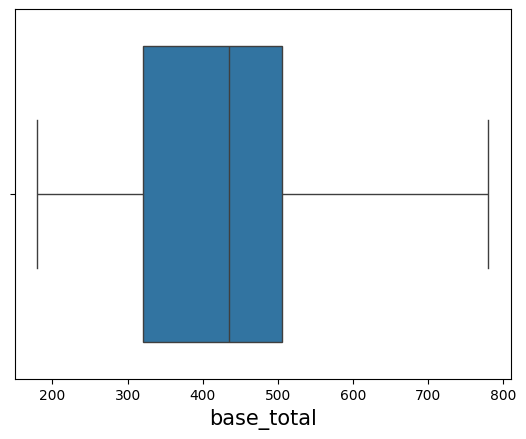

In [16]:
# Base Stat Total Distribution
# shows that though there are a couple legendary outliers on individual stats,
# pokemon are well balanced across base stat total
sns.boxplot(x=df['base_total'])
plt.xlabel('base_total',fontdict={'fontsize':15})

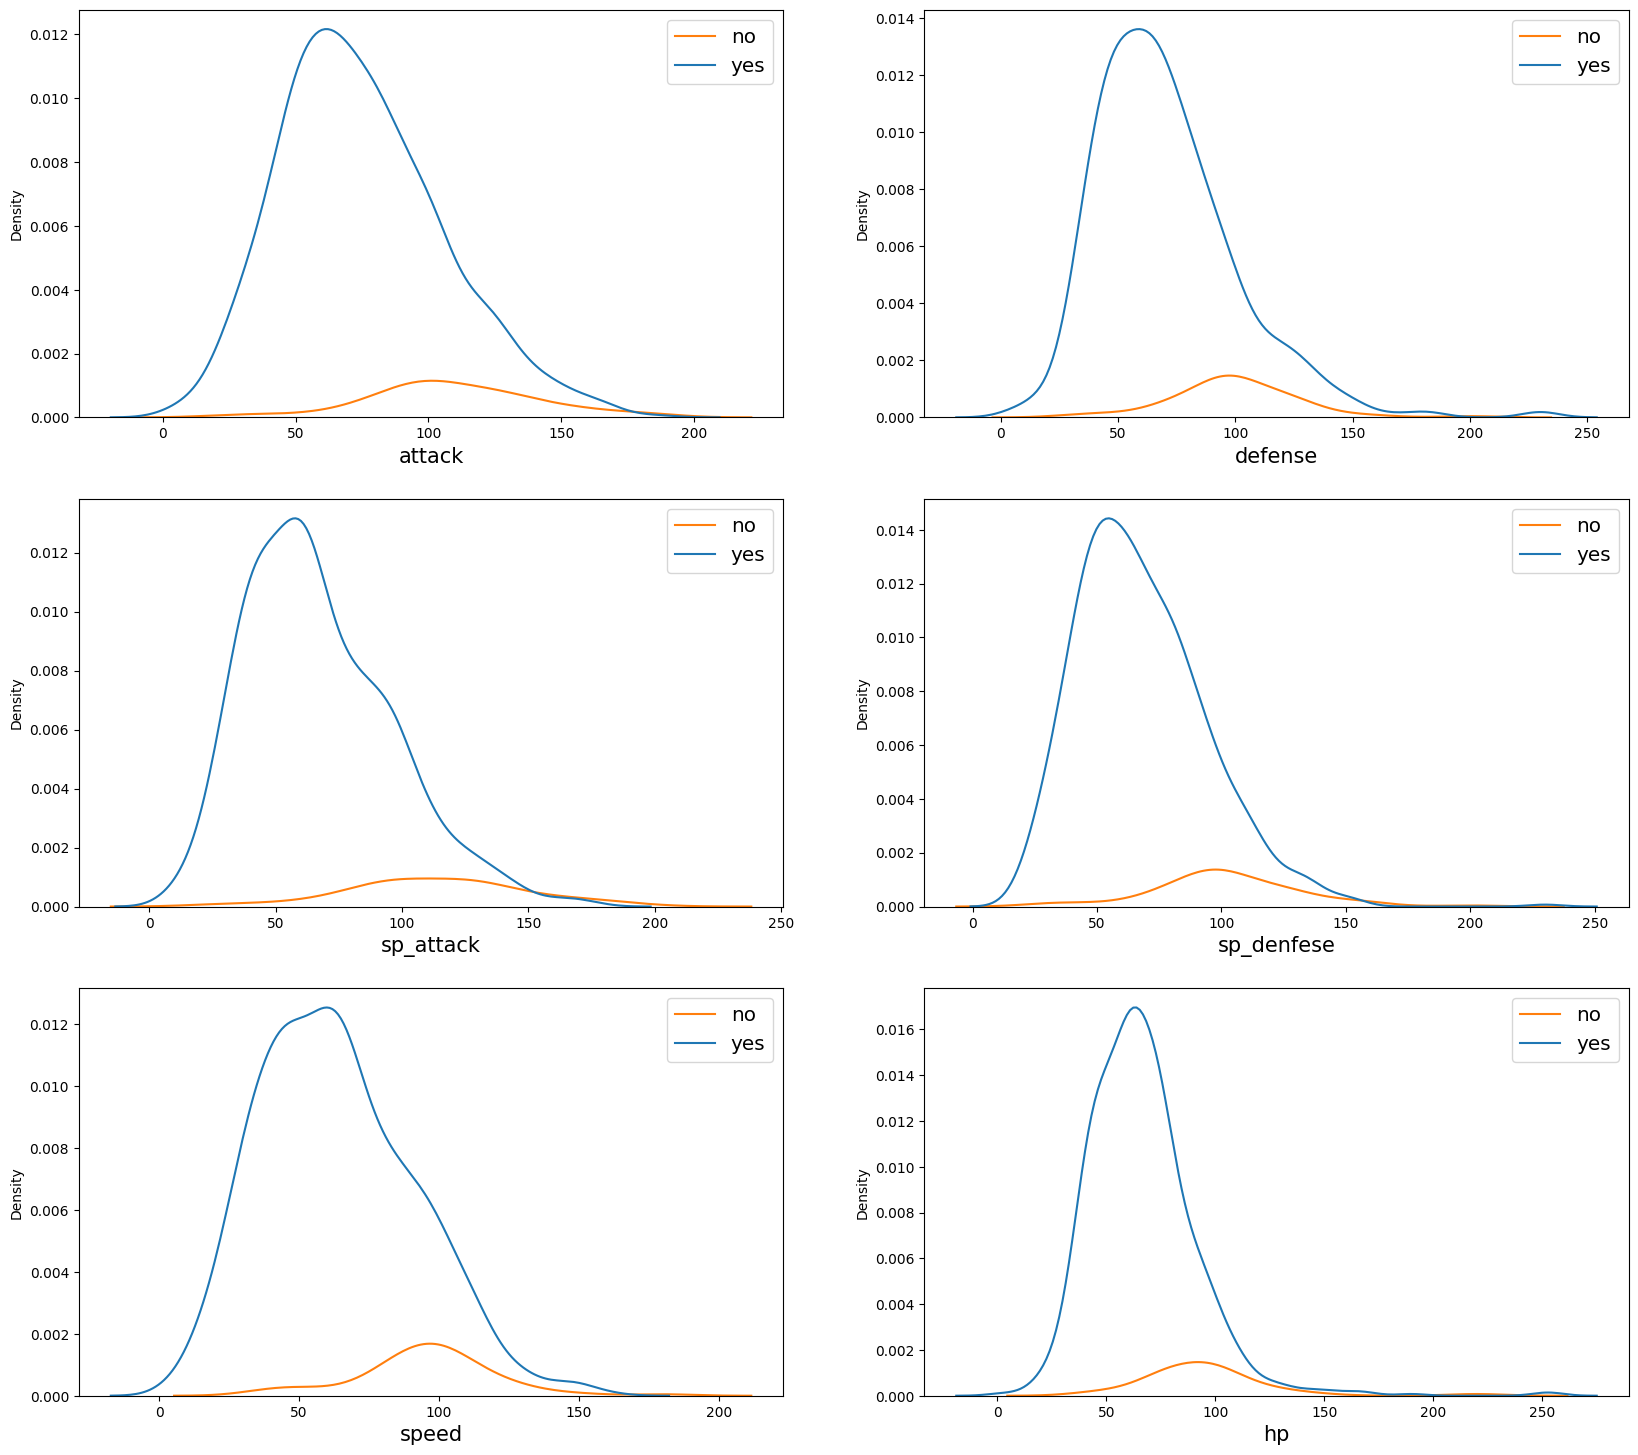

In [17]:
# stat distributions across all pokemon by legendary status
# right skew shows that in general pokemon are towards the lower end of the stat spectrum

fig , ax = plt.subplots(nrows=3,ncols=2,figsize=(20,18))

sns.kdeplot(x=df['attack'],ax=ax[0][0],hue=df['is_legendary'])
ax[0][0].set_xlabel('attack',fontdict={'fontsize':15})

sns.kdeplot(x=df['defense'],ax=ax[0][1],hue=df['is_legendary'])
ax[0][1].set_xlabel('defense',fontdict={'fontsize':15})

sns.kdeplot(x=df['sp_attack'],ax=ax[1][0],hue=df['is_legendary'])
ax[1][0].set_xlabel('sp_attack',fontdict={'fontsize':15})

sns.kdeplot(x=df['sp_defense'],ax=ax[1][1],hue=df['is_legendary'])
ax[1][1].set_xlabel('sp_denfese',fontdict={'fontsize':15})

sns.kdeplot(x=df['speed'],ax=ax[2][0],hue=df['is_legendary'])
ax[2][0].set_xlabel('speed',fontdict={'fontsize':15})

sns.kdeplot(x=df['hp'],ax=ax[2][1],hue=df['is_legendary'])
ax[2][1].set_xlabel('hp',fontdict={'fontsize':15})

for i in range(3):
    for j in range(2):
        ax[i][j].legend(['no','yes'],fontsize="x-large")

Text(0.5, 0, 'base_total')

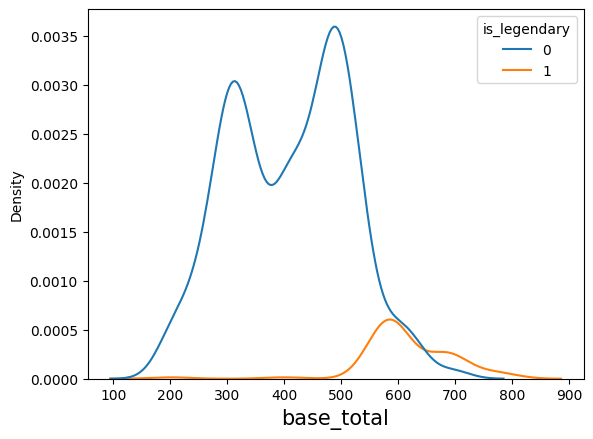

In [18]:
# shows stat skews according to legendary status
# TODO: add evolution stage to this plot
sns.kdeplot(x=df['base_total'],hue=df['is_legendary'])
plt.xlabel('base_total',fontdict={'fontsize':15})

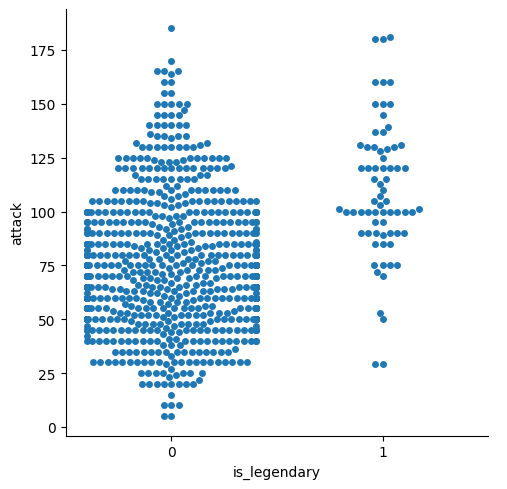

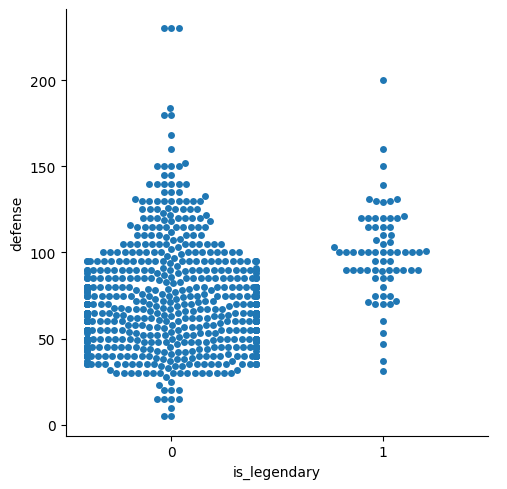

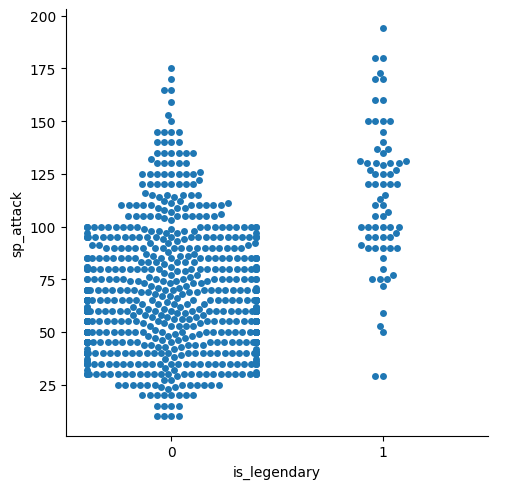

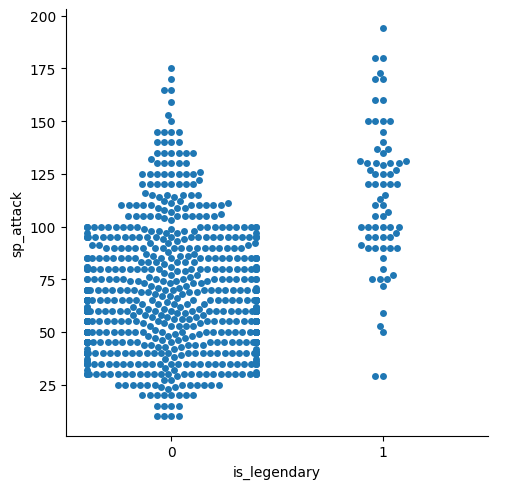

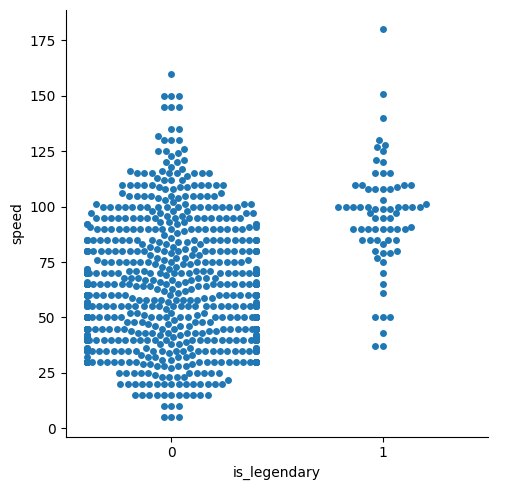

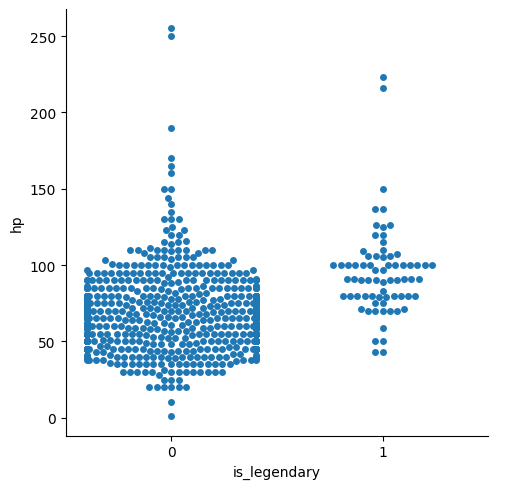

In [19]:
# swarm plots with respect to diffrent stats

sns.catplot(y='attack',x='is_legendary',data=df,kind='swarm')

sns.catplot(y='defense',x='is_legendary',data=df,kind='swarm')

sns.catplot(y='sp_attack',x='is_legendary',data=df,kind='swarm')

sns.catplot(y='sp_attack',x='is_legendary',data=df,kind='swarm')

sns.catplot(y='speed',x='is_legendary',data=df,kind='swarm')

sns.catplot(y='hp',x='is_legendary',data=df,kind='swarm')

Text(0.5, 0, 'weight_kg')

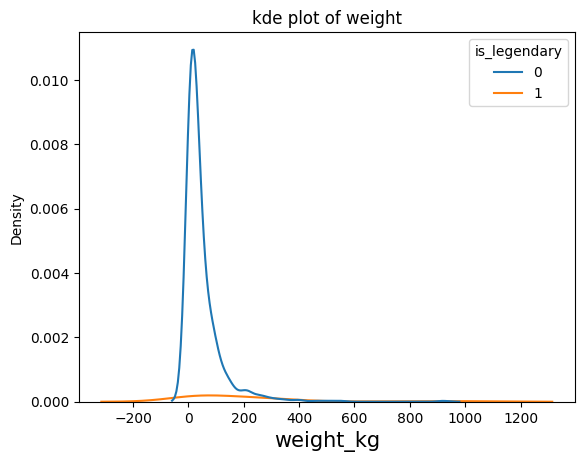

In [20]:
sns.kdeplot(x=df['weight_kg'],hue=df['is_legendary'])
plt.title('kde plot of weight')
plt.xlabel('weight_kg',fontdict={'fontsize':15})# Kernel Density Estimation of Height and Weight

Text(0.5, 0, 'height_m')

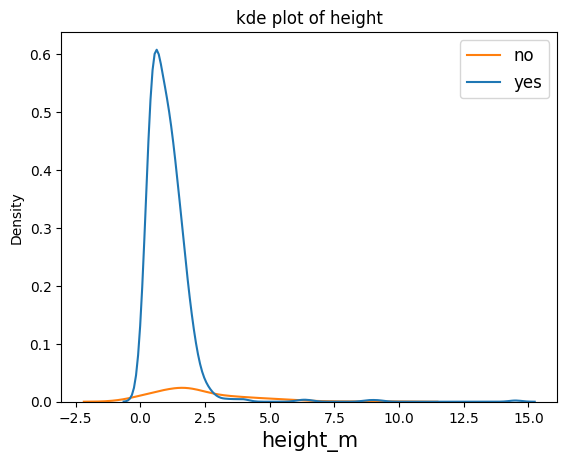

In [21]:
sns.kdeplot(x=df['height_m'],hue=df['is_legendary'])
plt.title('kde plot of height')
plt.legend(['no','yes'],fontsize="large")
plt.xlabel('height_m',fontdict={'fontsize':15})

Text(0.5, 1.0, 'type1')

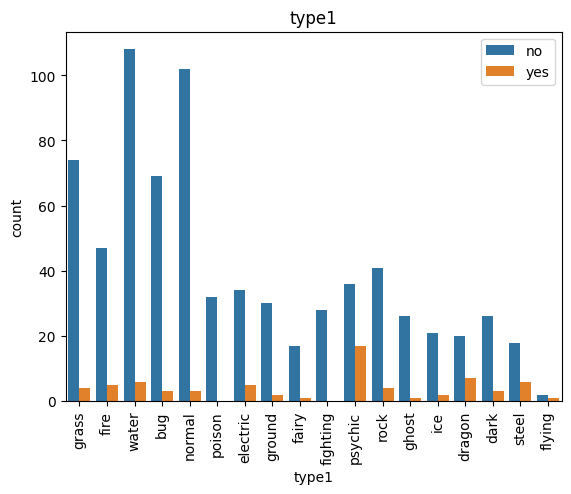

In [22]:
# primary type distribution
sns.countplot(x='type1',data=df,hue='is_legendary')
plt.legend(['no','yes'])
plt.xticks(rotation=90)
plt.title('type1')

In [23]:
# check spread of single or dual type
def create(x):
    if(x==-1):return 1
    return 2

df['typing'] = df['type2'].fillna(-1).apply(create)

Text(0.5, 1.0, 'typing (Dual type or Single type)')

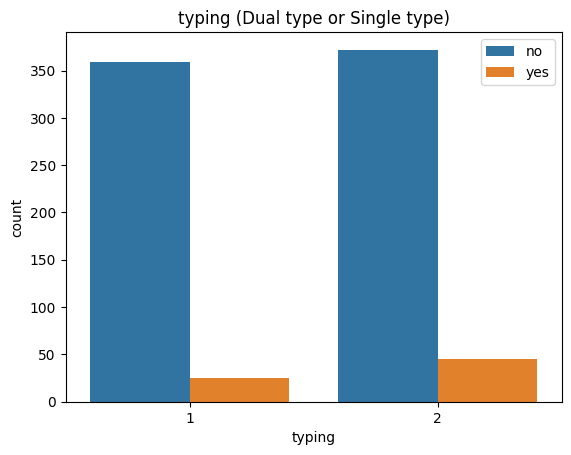

In [24]:
sns.countplot(x='typing',data=df,hue=df['is_legendary'])
plt.legend(['no','yes'])
plt.title('typing (Dual type or Single type)')

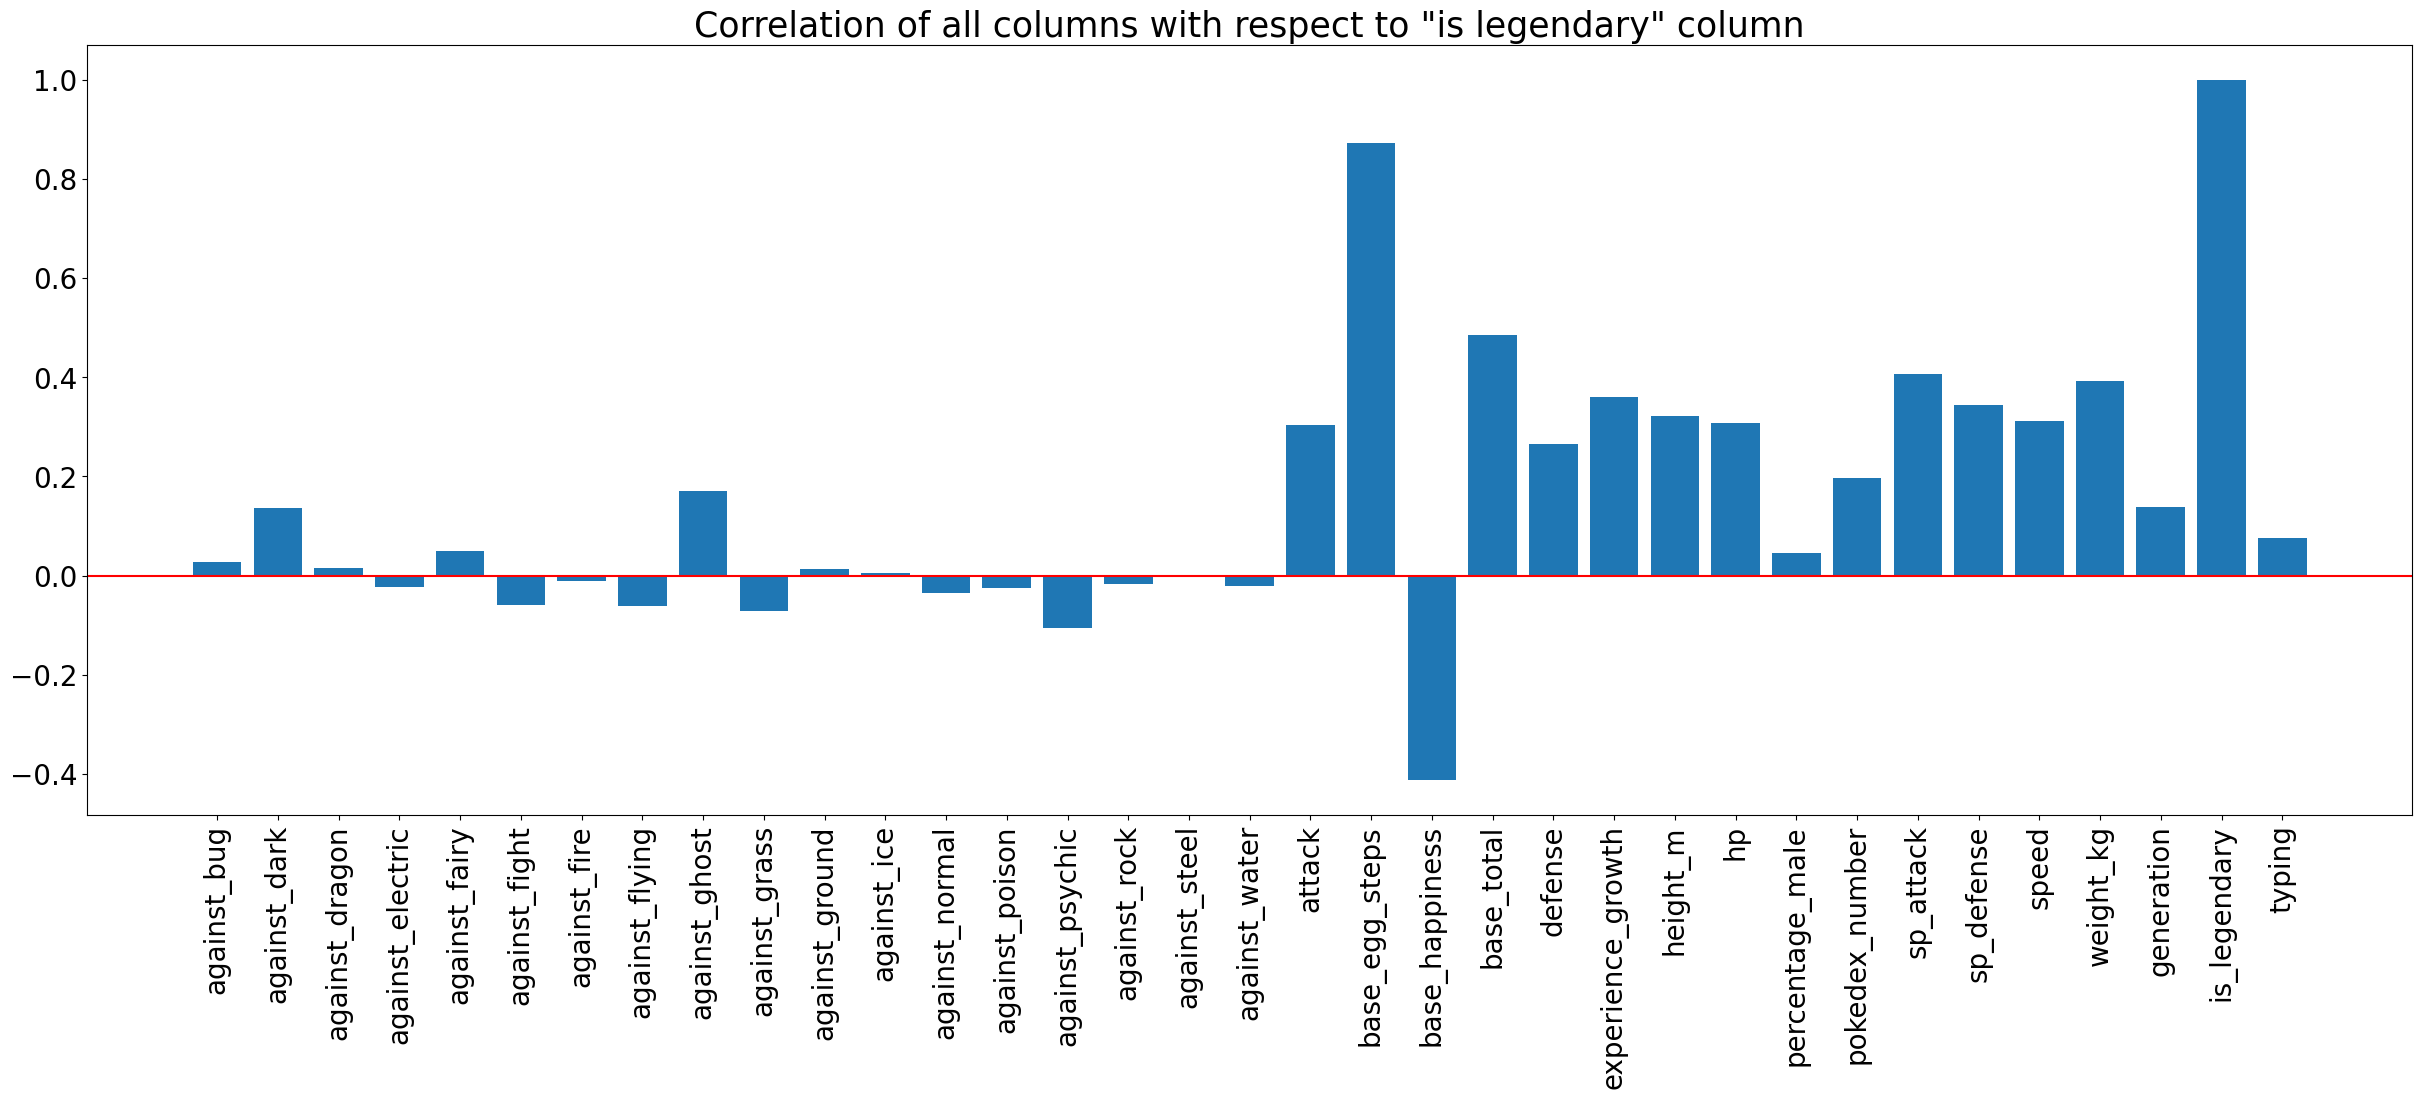

In [25]:
# correlate all columns with respect to legendary status
plt.figure(figsize=(30,10))
plt.axhline(y=0, c="red")
plt.bar(x = df.corr(numeric_only=True)['is_legendary'].index,height=df.corr(numeric_only=True)['is_legendary'])
plt.xticks(rotation=90)
plt.title('Correlation of all columns with respect to "is legendary" column',fontdict={'fontsize':25})
plt.tick_params(labelsize=20)
plt.show()

Text(0.5, 1.0, 'Heatmap')

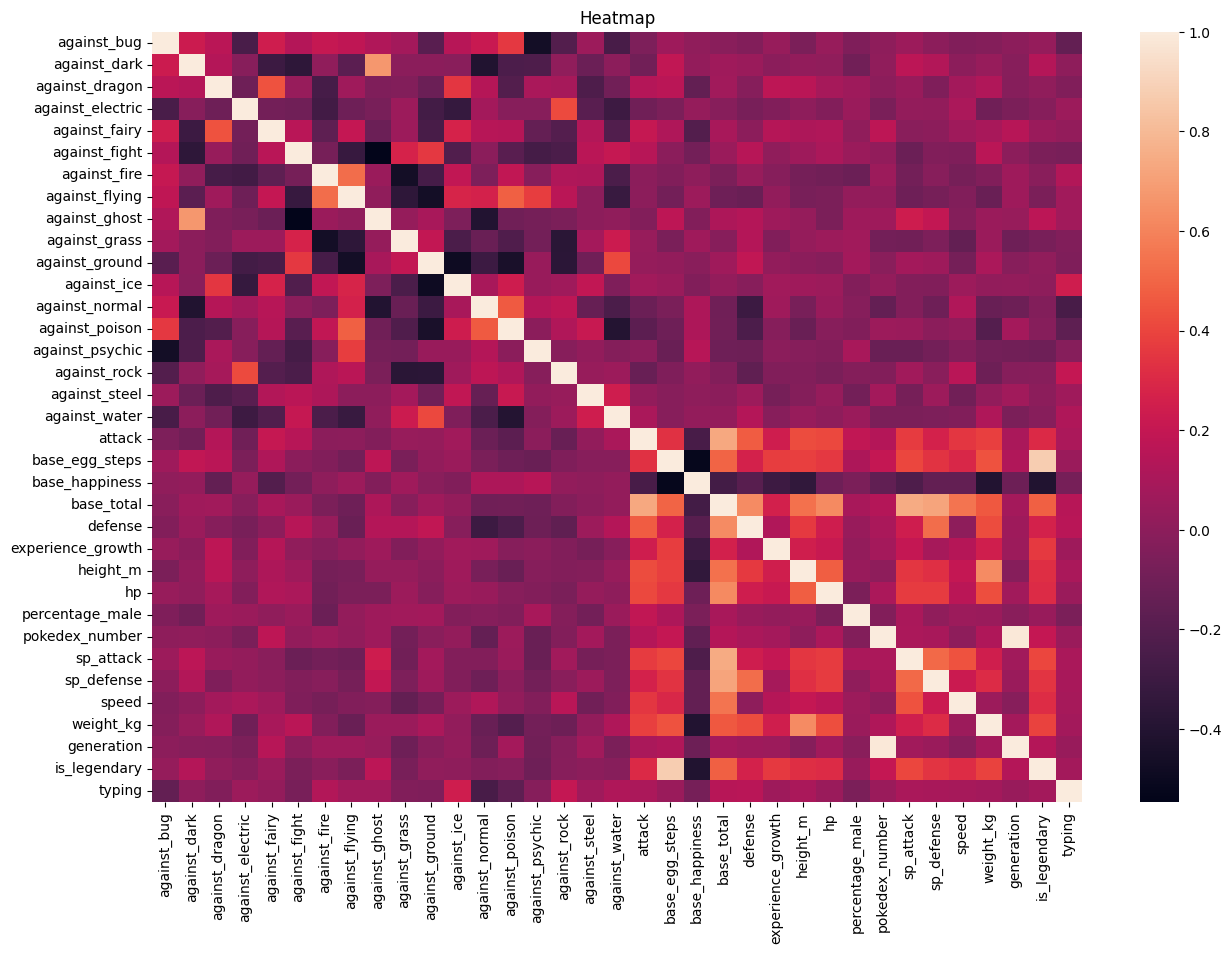

In [26]:
# Variable correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True))
plt.title('Heatmap')

### Feature Engineering

In [27]:
# check for null values across columns and fill them
df.isnull().sum()[df.isnull().sum()>0]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

In [28]:
df['height_m'].fillna(df['height_m'].mean(),inplace=True)
df['percentage_male'].fillna(df['percentage_male'].mean(),inplace=True)
df['weight_kg'].fillna(df['weight_kg'].mean(),inplace=True)

# How are these different? Below code didnt work
# empty_attrs = df.isnull().sum()[df.isnull().sum()>0].index.tolist()
# empty_attrs.remove('type2')
# print(empty_attrs)

# for attr in empty_attrs:
#     df[attr] = df[attr].fillna(df[attr].mean(), inplace=True)

In [29]:
# ensure only type2 is left
cols_w_nulls = df.isnull().sum()[df.isnull().sum()>0].index.tolist()
assert len(cols_w_nulls) == 1

In [30]:
df.columns
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,typing
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,2
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,2
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,2
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,1
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,1


In [31]:
# remove unnecessary columns
df.drop(['japanese_name'], axis=1, inplace=True)

In [32]:
df.shape


(801, 41)

In [33]:
# work with the abilities column
abilities = set()
for idx, i in enumerate(range(df.shape[0])):
    # using hard coded value
    # temp = df.iloc[i,:1][0].split(',')
    # using column name
    temp = df['abilities'].iloc[i].split(',')
    if idx == 0:
        print(temp)
    for j in range(len(temp)):
        if idx == 0:
            print(j)
            print(temp[j])
        s = ''.join(filter(lambda char: char not in ['[', ']',"'"],temp[j]))
        if(s[0]==' '):s=s[1:]
        abilities.add(s)

print('There are',len(abilities),'unique abilities')

["['Overgrow'", " 'Chlorophyll']"]
0
['Overgrow'
1
 'Chlorophyll']
There are 227 unique abilities


In [34]:
# create a new column for each ability
for i in abilities:
    df[i] = [0] * df.shape[0]

In [35]:
# now that we are done with it, we can drop the abilities column
df.drop(['abilities'],axis=1,inplace=True)

In [36]:
# handle capture rate
# NOTE: not sure what the purpose of this is
print(df[df['capture_rate']=='30 (Meteorite)255 (Core)'].index[0])
df.loc[773,['capture_rate']]='30'

773


In [37]:
# change some cols from string to ints
df['capture_rate']=df['capture_rate'].astype(int)
df['experience_growth'] = df['experience_growth'].astype(int)
df['percentage_male'] = df['percentage_male'].astype(int)

In [38]:
pokemon_team = df[df['name'].isin([
    'Dragonite',
    'Typhlosion',
    'Ampharos',
    'Victreebel',
    'Gyarados',
    'Mewtwo'
])]

pokemon_team.drop([
    'against_bug',
    'against_dark',
    'against_dragon',
    'against_electric',
    'against_fairy',
    'against_fight',
    'against_fire',
    'against_flying',
    'against_ghost',
    'against_grass',
    'against_ground',
    'against_ice',
    'against_normal',
    'against_poison',
    'against_psychic',
    'against_rock',
    'against_steel',
    'against_water',
    'base_egg_steps',
    'capture_rate',
    'experience_growth',
    'height_m',
    'percentage_male',
    'pokedex_number',
    'weight_kg',
    'generation',
    'is_legendary',
], axis=1, inplace=True)

pokemon_team.to_json('pokemon_team.json', orient='records')